# Solo Mode Dimensionality Reduction

### 1. Objective

The goal of this notebook is to examine whether behavioral Solo features 
contain latent structure that can be captured through Principal Component Analysis (PCA).

We aim to:

1. Standardize behavioral variables  
2. Perform PCA  
3. Interpret principal components  
4. Examine explained variance  
5. Relate principal components to win rate      

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

sns.set_style("whitegrid")

plt.rcParams.update({
    "font.family": "Times New Roman",
    "font.size": 11,
    "axes.titlesize": 14,
    "axes.titleweight": "bold",
    "axes.labelsize": 12,
    "axes.labelweight": "bold",
})

In [10]:
df = pd.read_csv("../data/Fortnite_players_stats.csv")
df = df[df["Solo matches"] >= 50].copy()

df["Solo_kpm"] = df["Solo kills"] / df["Solo matches"]
df["Solo_mpm"] = df["Solo minutesPlayed"] / df["Solo matches"]
df["Solo_wr"]  = df["Solo top1"] / df["Solo matches"]

In [11]:
features = ["Solo kd", "Solo_kpm", "Solo_mpm"]

X = df[features].values
y = df["Solo_wr"].values

### 2. Feature Space Definition

Only behavioral variables are included in PCA:

1. Solo kd  
2. Solo_kpm  
3. Solo_mpm  

Win rate is excluded to prevent mixing behavioral structure with outcome.

In [12]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### 3. Standardization

Each variable is standardized using z-score normalization:

z = (x − μ) / σ

This ensures equal contribution of features in covariance structure.

In [13]:
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

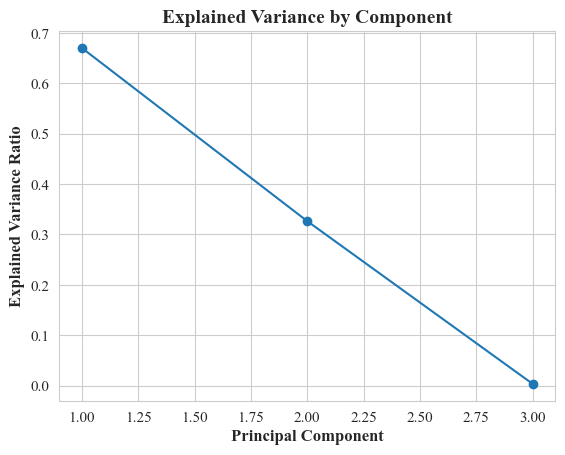

array([0.67001403, 0.32639968, 0.00358629])

In [14]:
explained_var = pca.explained_variance_ratio_

plt.figure()
plt.plot(range(1, len(explained_var) + 1), explained_var, marker="o")
plt.xlabel("Principal Component")
plt.ylabel("Explained Variance Ratio")
plt.title("Explained Variance by Component")
plt.show()

explained_var   

### 4. Explained Variance

We examine how much variance each principal component captures.

If the first component explains a large proportion of variance, 
a dominant behavioral direction exists.

In [15]:
loadings = pd.DataFrame(
    pca.components_.T,
    columns=[f"PC{i+1}" for i in range(len(features))],
    index=features
)

loadings

,PC1,PC2,PC3
Solo kd,0.701054,-0.082801,0.708285
Solo_kpm,0.698311,-0.121570,-0.705395
Solo_mpm,0.144514,0.989123,-0.027407


### 5. Principal Component Interpretation

Loadings indicate how strongly each original variable contributes to a component.

Interpretation focuses on:

1. Sign of loadings  
2. Magnitude of loadings  
3. Behavioral meaning of each component 

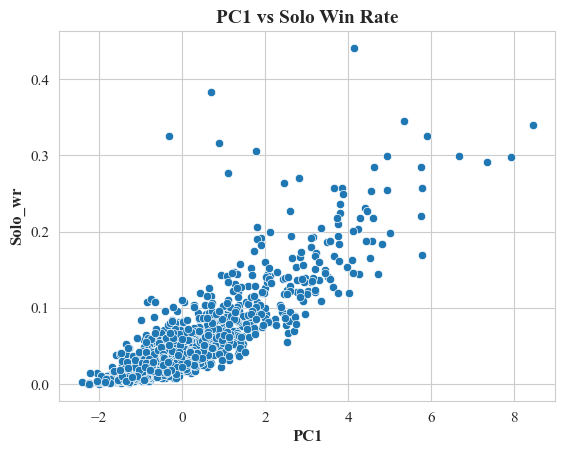

np.float64(0.850594207347522)

In [16]:
pc_df = pd.DataFrame(X_pca[:, :2], columns=["PC1", "PC2"])
pc_df["Solo_wr"] = y

plt.figure()
sns.scatterplot(data=pc_df, x="PC1", y="Solo_wr")
plt.title("PC1 vs Solo Win Rate")
plt.show()

np.corrcoef(pc_df["PC1"], pc_df["Solo_wr"])[0,1]

### 6. Principal Components and Success

We examine whether the dominant behavioral direction 
is associated with competitive success.

### 7. Conclusions

1. Principal Component 1 explains approximately 67% of total behavioral variance, indicating the existence of a dominant gameplay axis.

2. PC1 is primarily defined by Solo kd and Solo_kpm, representing combat efficiency and offensive dominance.

3. Principal Component 2 is almost entirely determined by Solo_mpm, capturing survival duration as a separate behavioral dimension.

4. The behavioral space of Solo players is effectively two-dimensional: combat dominance and survival tendency.

5. A strong positive relationship is observed between PC1 and Solo win rate, suggesting that combat efficiency is the primary driver of competitive success.

6. Given its interpretability and statistical dominance, PC1 can be considered a candidate Skill Index for Solo mode.

The next stage involves examining whether distinct behavioral archetypes emerge within this reduced space.